In [2]:
import pandas as pd
import numpy as np
import re
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc
# plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

In [4]:
# mag_ce = pd.read_csv('./magazine/final/magazine_ce_stickword.csv', sep='|', encoding = 'utf-8')

In [ ]:
mag_ce = pd.read_csv('./magazine/final/magazine2_ce.csv', sep='|', encoding = 'utf-8')

In [5]:
mag_ce.head()

,magazine,brand,title,link,date,word_celine,ADFN,ADFN_2
0,A,Ce,코트 체크,http://www.allurekorea.com/2020/11/10/%ec%bd%9...,2020-11-10,"골드 잠금 장식으로 포인트를 준 케이프 체크 코트는 1백9만원, 산드로(SANDRO...","['골드', '장식', '포인트', '준', '케이프', '체크', '코트', '백...","['골드', '장식', '포인트', '준', '케이프', '체크', '코트', '백..."
1,A,Ce,데님이여 영원하라,http://www.allurekorea.com/2020/11/06/%eb%8d%b...,2020-11-06,"빈티지한 주름과 워싱이 특징인 데님 팬츠는 가격미정, CELINE(CELINE).","['빈티지', '한', '주름', '워싱', '특징', '데님', '팬츠', 'CE...","['빈티지', '한', '주름', '워싱', '특징', '데님', '팬츠', 'CE..."
2,A,Ce,남자 백’까지 갖고 싶어,http://www.allurekorea.com/2020/11/04/%eb%82%a...,2020-11-04,1970년대 에스닉한 분위기가 물씬 풍기는 CELINE의 방패 모양 숄더백.,"['대', '에스', '닉', '분위기', '물씬', 'CELINE', '방패', ...","['대', 에스닉, '분위기', '물씬', 'CELINE', '방패', '모양', ..."
3,A,Ce,예림-예리,http://www.allurekorea.com/2020/11/03/%ec%98%8...,2020-11-03,"재킷, 셔츠, 슈즈는 CELINE(CELINE), 블랙 스커트는 렉토, 이어링은 스...","['재킷', '셔츠', '슈즈', 'CELINE', 'CELINE', '블랙', '...","['재킷', '셔츠', '슈즈', 'CELINE', 'CELINE', '블랙', '..."
4,A,Ce,"GOOD TIME, 헨리",http://www.allurekorea.com/2020/10/26/good-tim...,2020-10-26,"재킷, 셔츠, 네크리스는 모두 CELINE(CELINE), 팬츠는 다잉브리드, 슈즈...","['재킷', '셔츠', '크리스', 'CELINE', 'CELINE', '팬츠', ...","['재킷', '셔츠', '크리스', 'CELINE', 'CELINE', '팬츠', ..."


In [6]:
mag_ce['ADFN'] = mag_ce['ADFN'].str.replace('[', '').str.replace(']', '').str.replace("'", "").str.split(', ')

### top50 리스트 생성

In [7]:
top500 = pd.read_csv('./magazine/final/ce_ADFN_rank_dropword.csv', sep='|', encoding='utf-8')

In [9]:
top50 = []
for i in range(50):
    top50.append(top500.loc[i, 'word'])
    
print(len(top50))
print(top50)

50
['CELINE', '컬렉션', 'HEDI', '브랜드', '패션', '룩', '시즌', '디자이너', '백', '컬러', '스타일', '여성', '드레스', '남성', '쇼', '디자인', '장식', '팬츠', 'PHOEBE', '디렉터', '재킷', '코트', '파리', '새로운', '옷', '아이템', '그녀', '사진', '매치', '모델', '소재', '크리에이티브', '로고', '블랙', '가죽', '트렌드', '스커트', '런웨이', '영국', '실루엣', '봄', '셔츠', '부츠', '클래식', '다양한', '매력', '연출', '여름', '럭셔리', '화이트']


### top100 리스트 생성

In [10]:
top100 = []
for i in range(100):
    top100.append(top500.loc[i, 'word'])
    
print(len(top100))
print(top100)

100
['CELINE', '컬렉션', 'HEDI', '브랜드', '패션', '룩', '시즌', '디자이너', '백', '컬러', '스타일', '여성', '드레스', '남성', '쇼', '디자인', '장식', '팬츠', 'PHOEBE', '디렉터', '재킷', '코트', '파리', '새로운', '옷', '아이템', '그녀', '사진', '매치', '모델', '소재', '크리에이티브', '로고', '블랙', '가죽', '트렌드', '스커트', '런웨이', '영국', '실루엣', '봄', '셔츠', '부츠', '클래식', '다양한', '매력', '연출', '여름', '럭셔리', '화이트', '매장', '데님', '생각', '라인', '영감', '가방', '무드', '프린트', '사이즈', '변화', '세계', '수트', '에디', '슈즈', '패턴', '스타일링', '광고', '하우스', '액세서리', '데뷔', '패션위크', '영화', '패션쇼', '선택', '런던', '감', '이미지', '캠페인', '빈티지', '사랑', '슈트', '가을', '미니', '프라다', '시절', '존재', '겨울', '프랑스', '옴므', '동시', '분위기', '느낌', '베스트', '포인트', '선글라스', '뒤', '현재', '매출', '케이프', '스트리트']


In [11]:
t500 = []
for i in range(500):
    t500.append(top500.loc[i, 'word'])
    
print(len(t500))
print(t500)

500
['CELINE', '컬렉션', 'HEDI', '브랜드', '패션', '룩', '시즌', '디자이너', '백', '컬러', '스타일', '여성', '드레스', '남성', '쇼', '디자인', '장식', '팬츠', 'PHOEBE', '디렉터', '재킷', '코트', '파리', '새로운', '옷', '아이템', '그녀', '사진', '매치', '모델', '소재', '크리에이티브', '로고', '블랙', '가죽', '트렌드', '스커트', '런웨이', '영국', '실루엣', '봄', '셔츠', '부츠', '클래식', '다양한', '매력', '연출', '여름', '럭셔리', '화이트', '매장', '데님', '생각', '라인', '영감', '가방', '무드', '프린트', '사이즈', '변화', '세계', '수트', '에디', '슈즈', '패턴', '스타일링', '광고', '하우스', '액세서리', '데뷔', '패션위크', '영화', '패션쇼', '선택', '런던', '감', '이미지', '캠페인', '빈티지', '사랑', '슈트', '가을', '미니', '프라다', '시절', '존재', '겨울', '프랑스', '옴므', '동시', '분위기', '느낌', '베스트', '포인트', '선글라스', '뒤', '현재', '매출', '케이프', '스트리트', '니트', '벨트', '활용', '표현', '스니커즈', '트렌치코트', '뉴욕', '리', '향수', '오버', '톱', '웨어', '볼', '세대', '대해', '진행', '체크', '인스타그램', '피비', '리본', '발표', '골드', '메종', '살', '블라우스', '이제', '스타', '명품', '무늬', '스카프', '몸', '쇼핑', '좋은', '미국', '키', '이유', '레드', '새', '감각', '발렌티노', '머리', '유행', '리사', '아티스', '알', '시크', '여자', '우아한', '촬영', '어깨', '모던', '실용', '톤', '활동', '파워', '팀', '베', '

### top50만 남기기

In [12]:
len(mag_ce)

764

In [11]:
top50_word = []
for i in range(len(mag_ce)):
    w=[]
    for word in mag_ce.loc[i, 'ADFN']:
        if word in top50:
            w.append(word)
    top50_word.append(w)

len(top50_word)

764

### top100만 남기기

In [12]:
top100_word = []
for i in range(len(mag_ce)):
    w=[]
    for word in mag_ce.loc[i, 'ADFN']:
        if word in top100:
            w.append(word)
    top100_word.append(w)

len(top100_word)

764

In [13]:
top500_word = []
for i in range(len(mag_ce)):
    w=[]
    for word in mag_ce.loc[i, 'ADFN']:
        if word in t500:
            w.append(word)
    top500_word.append(w)

len(top500_word)

764

### itemlist만 남기기

In [14]:
item = ['백', '드레스', '재킷', '주얼리', '옷', '슈즈', '스커트', '팬츠', '가방', '슈트', '향수', '의상', '데님', '액세서리', '톱',
        '셔츠', '모자', '수트', '스니커즈', '니트', '시계', '워치', '핸드백', '벨트', '선글라스', 
        '목걸이', '티셔츠', '쇼츠', '샌들','귀고리', '워치', '코트', '부츠', '케이프']

In [13]:
item_word = []
for i in range(len(mag_ce)):
    w=[]
    for word in mag_ce.loc[i, 'ADFN']:
        if word in item:
            w.append(word)
    item_word.append(w)

len(item_word)

764

### top100이면서 item이 아닌것

In [14]:
top100_not_item_word = []
for i in range(len(mag_ce)):
    w=[]
    for word in mag_ce.loc[i, 'ADFN']:
        if word in top100:
            if word not in item :
                w.append(word)
    top100_not_item_word.append(w)

len(top100_not_item_word)

764

In [15]:
top100_not_item_word[0]

['장식', '컬러', '로고', '패턴', 'CELINE', '소재', '소재', 'CELINE', 'CELINE']

### top100이면서 common이 아닌 것

In [16]:
common = ['브랜드',
 '쇼',
 '모델',
 '장식',
 '드레스',
 '파리',
 '여성',
 '스타일',
 '컬러',
 '디자이너',
 '블랙',
 '재킷',
 '아이템',
 '옷',
 '디렉터',
 '팬츠']

In [17]:
top100_not_common_word = []
for i in range(len(mag_ce)):
    w=[]
    for word in mag_ce.loc[i, 'ADFN']:
        if word in top100:
            if word not in common :
                w.append(word)
    top100_not_common_word.append(w)

len(top100_not_common_word)

764

In [18]:
top100_not_common_word[0]

['코트',
 '백',
 '데님',
 '부츠',
 '백',
 '로고',
 '패턴',
 '백',
 'CELINE',
 '소재',
 '코트',
 '소재',
 '스커트',
 'CELINE',
 'CELINE',
 '부츠']

In [19]:
mag_ce['top50_word'] = top50_word

In [20]:
top50_word

[['장식',
  '코트',
  '백',
  '팬츠',
  '컬러',
  '부츠',
  '백',
  '로고',
  '백',
  'CELINE',
  '소재',
  '코트',
  '소재',
  '스커트',
  'CELINE',
  'CELINE',
  '부츠'],
 ['팬츠', 'CELINE', 'CELINE'],
 ['CELINE'],
 ['재킷', '셔츠', 'CELINE', 'CELINE', '블랙', '스커트', '스타일'],
 ['재킷', '셔츠', 'CELINE', 'CELINE', '팬츠'],
 ['새로운',
  'CELINE',
  '패션',
  '브랜드',
  '브랜드',
  '시즌',
  '브랜드',
  'CELINE',
  '브랜드',
  '새로운',
  '패션',
  '브랜드',
  '럭셔리',
  '브랜드',
  '럭셔리',
  '브랜드',
  '브랜드'],
 ['백', '팬츠', 'CELINE', 'CELINE'],
 ['컬러', '부츠', '부츠', 'CELINE', 'CELINE', '부츠'],
 ['CELINE',
  'CELINE',
  '스커트',
  '부츠',
  '백',
  '블랙',
  'CELINE',
  '블랙',
  '컬러',
  '컬러',
  '재킷',
  '스커트',
  '부츠'],
 ['장식', '클래식', '디자인', '로고', '장식', 'CELINE'],
 ['컬러',
  '디자인',
  '클래식',
  '디자인',
  '가죽',
  '장식',
  '장식',
  '컬러',
  '백',
  '백',
  'CELINE',
  'CELINE'],
 ['룩',
  '룩',
  '새로운',
  '디자인',
  '패션',
  '시즌',
  '디자이너',
  '시즌',
  '패션',
  '패션',
  '스타일',
  '룩',
  '여성',
  '장식',
  '옷',
  '여성',
  '셔츠',
  '룩',
  '드레스',
  '연출',
  '드레스',
  '룩',
  '룩',
  '여성',
  '장식',
  '장식',


In [21]:
type(top50_word)

list

In [22]:
top50_word[0]

['장식',
 '코트',
 '백',
 '팬츠',
 '컬러',
 '부츠',
 '백',
 '로고',
 '백',
 'CELINE',
 '소재',
 '코트',
 '소재',
 '스커트',
 'CELINE',
 'CELINE',
 '부츠']

In [23]:
mag_ce.to_csv('mag_ce.csv', sep ='|', encoding = 'utf-8', index = False)

### 한국어 NLP를 위한 konlpy 설치

In [24]:
from konlpy.tag import Twitter
twitter = Twitter()

C:\Users\i\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


### 텍스트 한줄씩 읽어와 dataset에 기록

### 어프라이어리(Apriori) 알고리즘을 적용하여 연관규칙 분석 수행

In [14]:
# 어프라이어리(Apriori)
from apyori import apriori

In [20]:
# 지지도(support) : P(A∩B)
result = list(apriori(top500_word, min_support = 0.05))
df = pd.DataFrame(result)
df['length'] = df['items'].apply(lambda x:len(x))
df = df[(df['length'] == 2)
        & (df['support'] >= 0.01)].sort_values(by='support', ascending = False)
df.head(10)

,items,support,ordered_statistics,length
222,"(컬렉션, CELINE)",0.298429,"[((), (컬렉션, CELINE), 0.29842931937172773, 1.0)...",2
171,"(브랜드, CELINE)",0.295812,"[((), (브랜드, CELINE), 0.29581151832460734, 1.0)...",2
229,"(패션, CELINE)",0.273560,"[((), (패션, CELINE), 0.27356020942408377, 1.0),...",2
196,"(시즌, CELINE)",0.257853,"[((), (시즌, CELINE), 0.25785340314136124, 1.0),...",2
146,"(CELINE, 디자이너)",0.243455,"[((), (CELINE, 디자이너), 0.24345549738219896, 1.0...",2
122,"(HEDI, CELINE)",0.234293,"[((), (HEDI, CELINE), 0.2342931937172775, 1.0)...",2
152,"(룩, CELINE)",0.230366,"[((), (룩, CELINE), 0.23036649214659685, 1.0), ...",2
192,"(스타일, CELINE)",0.204188,"[((), (스타일, CELINE), 0.20418848167539266, 1.0)...",2
147,"(디자인, CELINE)",0.202880,"[((), (디자인, CELINE), 0.20287958115183247, 1.0)...",2
164,"(백, CELINE)",0.200262,"[((), (백, CELINE), 0.20026178010471204, 1.0), ...",2


### networkx 그래프 정의

In [21]:
G = nx.Graph()
ar = (df['items']); G.add_edges_from(ar)

In [22]:
# 페이지 랭크
pr = nx.pagerank(G)
nsize = np.array([v for v in pr.values()])
nsize = 2000 * (nsize - min(nsize)) / (max(nsize) - min(nsize))

In [23]:
pos = nx.spring_layout(G)

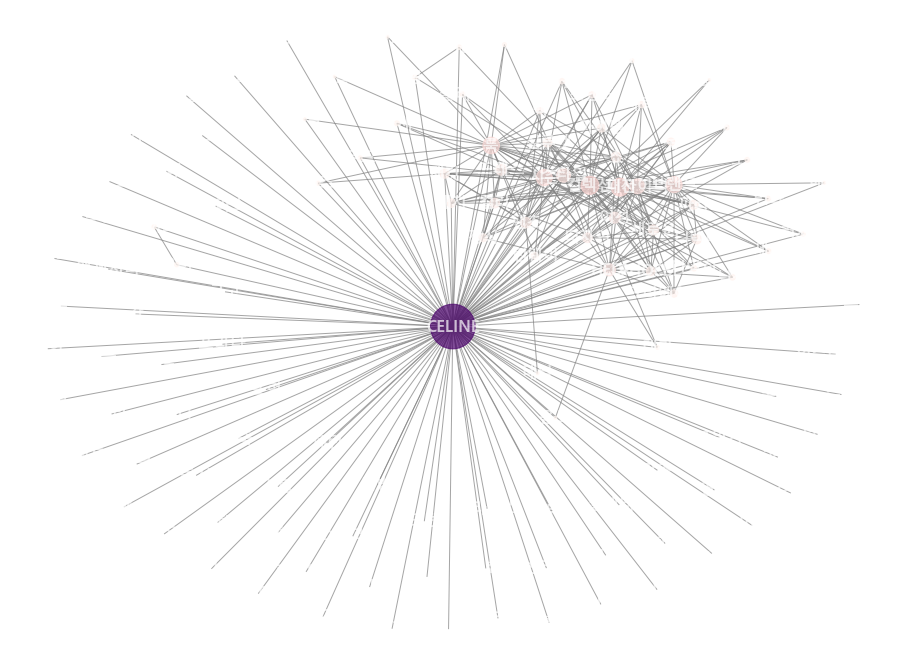

In [24]:
plt.figure(figsize = (16, 12)) ; plt.axis('off')
nx.draw_networkx(G, font_family = 'Malgun Gothic', font_size = 16,
                pos = pos, node_color = list(pr.values()), node_size = nsize,
                alpha=0.7, edge_color='.5', cmap = plt.cm.RdPu,
                font_color = 'white', font_weight = 'bold')

plt.savefig('./final_img/nt_celine_top500_min05-w.png', bbox_inches = 'tight', transparent = True)
plt.show()
